In [1]:
# import des modules nécessaires
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.patches as mpatches
from distinctipy import distinctipy
from matplotlib.font_manager import FontProperties
from matplotlib import rc
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import ipywidgets as widgets
from IPython.display import clear_output, display
from scipy.stats import chi2_contingency as chi2_contingency
import statsmodels.formula.api as statsapi
import statsmodels as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import xlrd as xlrd
from matplotlib import font_manager # for mac users
import platform
import os
from sklearn.decomposition import PCA

# Modifier les paramètres d'affichage de la sortie des commandes dans Jupyter
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 100)

# Pour lister les polices présentes
#fpaths = matplotlib.font_manager.findSystemFonts()
#for i in fpaths:
#    f = matplotlib.font_manager.get_font(i)
#    print(f.family_name)
# import de la police Garamond

system = platform.system()

if system == 'Darwin':  # macOS
  font_path = '/Library/Fonts/GaramondPremrPro.otf'
elif system == 'Windows':
  font_path = 'C:/Windows/Fonts/GARA.TTF'
else:  #  unix
  font_path = 'GARA.TTF'
print(font_path)

garamond_font = FontProperties(fname="/Library/Fonts/GaramondPremrPro.otf",size=14)
#    timesnewroman_font = FontProperties(fname="C:/Windows/Fonts/TIMES.TTF",size=14)

font_manager.findSystemFonts(fontpaths=font_path, fontext="ttf")
font_manager.findfont("Garamond Premier Pro") 

# Définissez la police par défaut pour toute la figure
matplotlib.rcParams['font.family'] = 'Garamond Premier Pro'

/Library/Fonts/GaramondPremrPro.otf


In [32]:
# Chargement des données PINGOUIN
df_pingouin = pd.read_table("input/mlsupervise/penguins_size.csv",sep=",")

# Ajout titre colonnes
df_pingouin.columns=["species","island","culmen_length_mm","culmen_depth_mm","flipper_length_mm","body_mass_g","sex"]

# Verif données
#print(df_pingouin.head(5))
#print("Shape des données PINGOUIN: ", df_pingouin.shape)

df_pingouin.dropna(inplace=True) # on perd 7 enregistrements seulement

Projet 1. Les pingouins

In [38]:
# Projet 1. Question 1. Arbre de profondeur 1

# import des librairies
import scikit-learn
from scikit-learn.tree import plot_tree
#from sklearn.tree import tree
from scikit-learn.tree import DecisionTreeClassifier

# Définition des tableaux de données X et Y
X = df_pingouin[["culmen_length_mm","culmen_depth_mm","flipper_length_mm"]]
Y = df_pingouin["species"]

# Entrainement d'un arbre de profondeur 1
clf = DecisionTreeClassifier(criterion="gini",splitter="best",max_depth=1)
clf = clf.fit(X,Y)


# Affichage de l'Arbre
fig = plt.figure()
plot_tree(clf,filled=True)
plt.title("Arbre de profondeur 1 sur les données Pingouin")
plt.show()

SyntaxError: invalid syntax (4006388669.py, line 4)

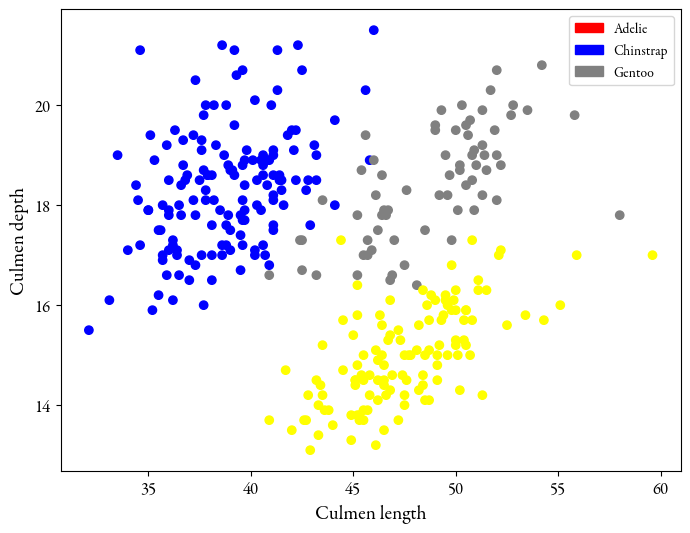

In [34]:
# # Projet 1. Question 2. Scatterplot avec couleur en fonction de l'espece

# Affichage des données avec 2 composantes principales, données brutes
labels = ["Adelie","Chinstrap","Gentoo"]
(fig, ax) = plt.subplots(figsize=(8, 6)) # ax = fig.add_subplot()
colors={"Adelie":"blue","Chinstrap":"grey","Gentoo":"yellow"}
sctt=ax.scatter(x=df_pingouin["culmen_length_mm"],y=df_pingouin["culmen_depth_mm"], c=df_pingouin["species"].map(colors))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Culmen length", fontsize=14)
plt.ylabel("Culmen depth", fontsize=14)

# Créez une légende avec des labels spécifiques aux catégories d'iris
blue_patch = mpatches.Patch(color='red', label='Adelie')
grey_patch = mpatches.Patch(color='blue', label='Chinstrap')
yellow_patch = mpatches.Patch(color='grey', label='Gentoo')
ax.legend(handles=[blue_patch,grey_patch,yellow_patch])

# Afficher
plt.show()

In [36]:
# Projet 1. Question 3. Scatterplot avec la partition de l'arbre

# import des librairies
from sklearn.inspection import DecisionBoundaryDisplay

# Plot the decision boundary
ax = plt.subplot(2, 3)
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    cmap=plt.cm.RdYlBu,
    response_method="predict",
    ax=ax,
    xlabel=df_pingouin["culmen_length_mm"],
    ylabel=df_pingouin["culmen_depth_mm"],
)




ImportError: cannot import name '_fit_context' from 'sklearn.base' (/Users/delphine/Applications/anaconda3/lib/python3.10/site-packages/sklearn/base.py)